<a href="https://colab.research.google.com/github/renearide/Analise_Dados_Amazon/blob/main/Analise_de_Dados_AMAZON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Instalando e Importando Bibliotecas

In [62]:
# download TA-Lib 
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 

--2023-01-25 16:58:45--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-01-25 16:58:45--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-01-25 16:58:45--  http://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving pilotfibe

In [63]:
!ls

sample_data  ta-lib-0.4.0-src.tar.gz


In [64]:
!tar xvzf ta-lib-0.4.0-src.tar.gz

ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/output.1
ta-lib/autom4te.cache/traces.0
ta-lib/autom4te.cache/traces.1
ta-lib/ltmain.sh
ta-lib/ta-lib-config.in
ta-lib/src/
ta-lib/src/ta_func/
ta-lib/src/ta_func/ta_MACDFIX.c
ta-lib/src/ta_func/ta_CDLPIERCING.c
ta-lib/src/ta_func/ta_DIV.c
ta-lib/src/ta_func/ta_ROCR100.c
ta-lib/src/ta_func/ta_ADXR.c
ta-lib/src/ta_func/ta_MAVP.c
ta-lib/src/ta_func/ta_CDLCLOSINGMARUBOZU.c
ta-lib/src/ta_func/ta_COSH.

In [65]:
import os
os.chdir('ta-lib')
!./configure --prefix=/usr
!make
!make install

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /usr/bin/sed
checking for grep that handles long lines and -e... /usr/bin/grep
chec

In [66]:
os.chdir('../')
!ls

sample_data  ta-lib  ta-lib-0.4.0-src.tar.gz


In [67]:
!pip install TA-Lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached TA-Lib-0.4.25.tar.gz (271 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for TA-Lib: filename=TA_Lib-0.4.25-cp38-cp38-linux_x86_64.whl size=2510066 sha256=953877fa3dc1c76da48428a38baf4e1331598a7a441521bd6fa6e96b17a11107
  Stored in directory: /root/.cache/pip/wheels/da/72/bf/464831127ee8d6d9a5b76340a6a2f115182e159309dc3067ca
Successfully built TA-Lib


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
import yfinance as yf
import pandas as pd
import numpy as np
import talib as ta
from shapely.geometry import LineString
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
sbn.set()

###Criação DataFrame
---

In [69]:
acao = yf.Ticker('AMZN')

In [70]:
amzn = yf.download('AMZN','2006-01-01','2021-12-31')
amzn.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03 00:00:00-05:00,2.3735,2.3925,2.3125,2.3790,2.3790,151644000
2006-01-04 00:00:00-05:00,2.3745,2.3865,2.3345,2.3625,2.3625,148818000
2006-01-05 00:00:00-05:00,2.3580,2.4100,2.3555,2.3825,2.3825,108344000
2006-01-06 00:00:00-05:00,2.3985,2.4290,2.3660,2.3935,2.3935,123058000
2006-01-09 00:00:00-05:00,2.3275,2.3550,2.3200,2.3540,2.3540,178862000


In [71]:
amzn = amzn.reset_index()

In [72]:
amzn['Date'] = amzn['Date'].dt.strftime('%Y-%m-%d') #modifica o formato da Data para ano-mês-dia

In [73]:
amzn.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,2.373500,2.392500,2.312500,2.379000,2.379000,151644000
2006-01-04,2.374500,2.386500,2.334500,2.362500,2.362500,148818000
2006-01-05,2.358000,2.410000,2.355500,2.382500,2.382500,108344000
2006-01-06,2.398500,2.429000,2.366000,2.393500,2.393500,123058000
2006-01-09,2.327500,2.355000,2.320000,2.354000,2.354000,178862000
...,...,...,...,...,...,...
2021-12-23,170.427994,171.975006,170.149994,171.068497,171.068497,36788000
2021-12-27,171.037003,172.942993,169.215500,169.669495,169.669495,58688000
2021-12-28,170.182495,172.175995,169.135498,170.660995,170.660995,54638000


###Análise Exploratória das Variaveis

---

In [74]:
amzn.shape

(4027, 7)

In [75]:
amzn.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     2006-01-03    2.373500    2.392500    2.312500    2.379000    2.379000   
1     2006-01-04    2.374500    2.386500    2.334500    2.362500    2.362500   
2     2006-01-05    2.358000    2.410000    2.355500    2.382500    2.382500   
3     2006-01-06    2.398500    2.429000    2.366000    2.393500    2.393500   
4     2006-01-09    2.327500    2.355000    2.320000    2.354000    2.354000   
...          ...         ...         ...         ...         ...         ...   
4022  2021-12-23  170.427994  171.975006  170.149994  171.068497  171.068497   
4023  2021-12-27  171.037003  172.942993  169.215500  169.669495  169.669495   
4024  2021-12-28  170.182495  172.175995  169.135498  170.660995  170.660995   
4025  2021-12-29  170.839996  171.212006  168.600494  169.201004  169.201004   
4026  2021-12-30  169.699997  170.888000  168.524002  168.644501  168.644501   

       

In [76]:
amzn.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [77]:
amzn.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [78]:
amzn.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [79]:
amzn.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4.027000e+03
mean,40.790904,41.222893,40.314076,40.780680,40.780680,1.112382e+08
std,50.058335,50.584944,49.471232,50.026291,50.026291,9.187546e+07
min,1.304500,1.315000,1.288000,1.303500,1.303500,1.762600e+07
25%,6.001500,6.098000,5.877500,6.003500,6.003500,6.194100e+07
50%,15.461000,15.637000,15.262000,15.501500,15.501500,8.951000e+07
75%,59.936501,60.270750,59.420500,59.735750,59.735750,1.325480e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09


### Análise Descritiva das Variáveis

---

Novo Dataframe, extraindo apenas o primeiro dia útil de cada mês. Isso foi feito para realizar uma segunda análise de correlação. 

In [80]:
#amznBMS = amzn.reset_index() #reseta o índice Data

In [81]:
amznBMS=amzn.copy(deep=True)

In [82]:
amznBMS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,2.3735,2.3925,2.3125,2.3790,2.3790,151644000
1,2006-01-04,2.3745,2.3865,2.3345,2.3625,2.3625,148818000
2,2006-01-05,2.3580,2.4100,2.3555,2.3825,2.3825,108344000
3,2006-01-06,2.3985,2.4290,2.3660,2.3935,2.3935,123058000
4,2006-01-09,2.3275,2.3550,2.3200,2.3540,2.3540,178862000


In [83]:
#amznBMS['Date'] = pd.to_datetime(amzn.Date, format='%Y-%m-%d')#modifica o formato da Data para ano-mês-dia

In [84]:
#amznBMS['Date'] = amzn['Date'].dt.strftime('%Y-%m-%d') #modifica o formato da Data para ano-mês-dia

In [85]:
amznBMS.columns #mostra as colunas do DataFrame

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [86]:
pd.date_range('2017-01-01','2021-12-31', freq='BMS') #retorna o primeiro dia útil de cada mês

DatetimeIndex(['2017-01-02', '2017-02-01', '2017-03-01', '2017-04-03',
               '2017-05-01', '2017-06-01', '2017-07-03', '2017-08-01',
               '2017-09-01', '2017-10-02', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-02',
               '2018-05-01', '2018-06-01', '2018-07-02', '2018-08-01',
               '2018-09-03', '2018-10-01', '2018-11-01', '2018-12-03',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-03', '2019-07-01', '2019-08-01',
               '2019-09-02', '2019-10-01', '2019-11-01', '2019-12-02',
               '2020-01-01', '2020-02-03', '2020-03-02', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-03',
               '2020-09-01', '2020-10-01', '2020-11-02', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-03', '2021-06-01', '2021-07-01', '2021-08-02',
      

In [87]:
amznBMS['Primeiro_Pregao_Mes'] = amznBMS['Date'].isin(['2017-01-02', '2017-02-01', '2017-03-01', '2017-04-03', 
'2017-05-01', '2017-06-01', '2017-07-03', '2017-08-01','2017-09-01', '2017-10-02', '2017-11-01', '2017-12-01', 
'2018-01-01', '2018-02-01', '2018-03-01', '2018-04-02', '2018-05-01', '2018-06-01', '2018-07-02', '2018-08-01',
'2018-09-03', '2018-10-01', '2018-11-01', '2018-12-03', '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', 
'2019-05-01', '2019-06-03', '2019-07-01', '2019-08-01','2019-09-02', '2019-10-01', '2019-11-01', '2019-12-02', 
'2020-01-01', '2020-02-03', '2020-03-02', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-03',
'2020-09-01', '2020-10-01', '2020-11-02', '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
 '2021-05-03', '2021-06-01', '2021-07-01', '2021-08-02','2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01']) 
#criação de uma nova coluna que retorna true se a data é o primeiro dia últil do mês
amznBMS.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Primeiro_Pregao_Mes
0,2006-01-03,2.3735,2.3925,2.3125,2.3790,2.3790,151644000,False
1,2006-01-04,2.3745,2.3865,2.3345,2.3625,2.3625,148818000,False
2,2006-01-05,2.3580,2.4100,2.3555,2.3825,2.3825,108344000,False
3,2006-01-06,2.3985,2.4290,2.3660,2.3935,2.3935,123058000,False
4,2006-01-09,2.3275,2.3550,2.3200,2.3540,2.3540,178862000,False


In [88]:
amznBMS.loc[amznBMS['Primeiro_Pregao_Mes']==True] #filtra os dados, retornando apenas o primeiro dia últil de cada mês

,Date,Open,High,Low,Close,Adj Close,Volume,Primeiro_Pregao_Mes
2789,2017-02-01,41.460499,41.688999,41.247002,41.617500,41.617500,77004000,True
2808,2017-03-01,42.652500,42.741501,42.450500,42.653999,42.653999,55202000,True
2831,2017-04-03,44.400002,44.674500,44.271000,44.575500,44.575500,68446000,True
2850,2017-05-01,46.389999,47.720001,46.389999,47.411499,47.411499,109330000,True
2872,2017-06-01,49.929501,49.949501,49.568501,49.797501,49.797501,49096000,True
2894,2017-07-03,48.639500,48.724499,47.549999,47.682999,47.682999,58182000,True
2914,2017-08-01,49.805500,50.320000,49.578999,49.809502,49.809502,91452000,True
2937,2017-09-01,49.209999,49.224998,48.844002,48.912498,48.912498,50718000,True
2957,2017-10-02,48.200001,48.365501,47.605999,47.959499,47.959499,48858000,True
2979,2017-11-01,55.270000,55.448502,54.837002,55.183998,55.183998,75110000,True


In [89]:
del amznBMS['Primeiro_Pregao_Mes']

### Análise Categórica Simples

---


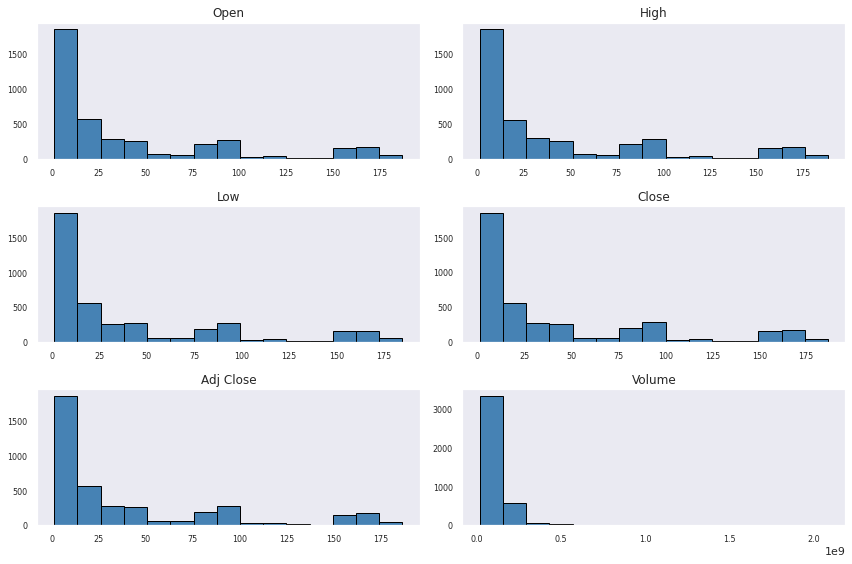

In [90]:
amzn.hist(bins = 15, color = 'steelblue', edgecolor='black', linewidth=1.0, xlabelsize= 8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0,0,2,2))

**Mapa de calor de correlação**

Primeira análise, feita com o DataFrame amzn:

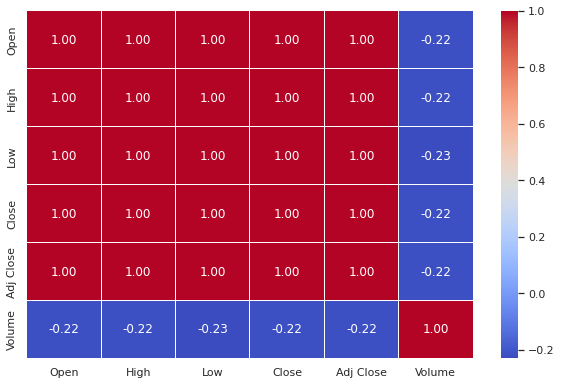

In [91]:
f, ax = plt.subplots(figsize=(10,6))
correlacao = amzn.corr(method='pearson')
hm = sbn.heatmap(round(correlacao,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.1)
f.subplots_adjust(top=0.93)

Segunda análise, feita com o DataFrame amznDateIndex (analisando apenas o primeiro dia útil de cada mês):

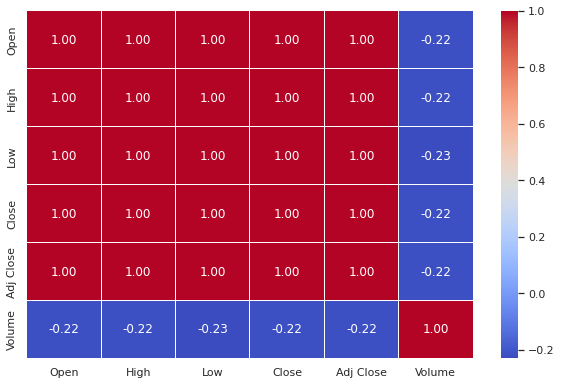

In [92]:
f, ax = plt.subplots(figsize=(10,6))
correlacao = amznBMS.corr(method='pearson')
hm = sbn.heatmap(round(correlacao,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.1)
f.subplots_adjust(top=0.93)

**Formação dos Quartis**

In [93]:
Q1 = amzn.quantile(0.25)
Q3 = amzn.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Open         5.393500e+01
High         5.417275e+01
Low          5.354300e+01
Close        5.373225e+01
Adj Close    5.373225e+01
Volume       7.060700e+07
dtype: float64


**Identificação de outliers**

In [94]:
df_outliers = amzn[((amzn <(Q1-1.5*IQR))| (amzn>(Q3 + 1.5*IQR))).any(axis=1)]

<ipython-input-94-8acf3fc05106>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliers = amzn[((amzn <(Q1-1.5*IQR))| (amzn>(Q3 + 1.5*IQR))).any(axis=1)]


In [95]:
(df_outliers<(Q1-1.5*IQR))|(df_outliers>(Q3+1.5*IQR))

<ipython-input-95-1d21e524b577>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df_outliers<(Q1-1.5*IQR))|(df_outliers>(Q3+1.5*IQR))


,Adj Close,Close,Date,High,Low,Open,Volume
21,False,False,False,False,False,False,True
22,False,False,False,False,False,False,True
77,False,False,False,False,False,False,True
94,False,False,False,False,False,False,True
140,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
4022,True,True,False,True,True,True,False
4023,True,True,False,True,True,True,False
4024,True,True,False,True,True,True,False
4025,True,True,False,True,True,True,False


In [96]:
amznVolume = amzn.drop(['Open','High','Low','Close','Adj Close'], axis = 1)

In [97]:
Q1 = amznVolume.quantile(0.25)
Q3 = amznVolume.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Volume    70607000.0
dtype: float64


In [98]:
df_outliersVolume = amznVolume[((amznVolume <(Q1-1.5*IQR))| (amznVolume>(Q3 + 1.5*IQR))).any(axis=1)]

<ipython-input-98-406e655701bc>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliersVolume = amznVolume[((amznVolume <(Q1-1.5*IQR))| (amznVolume>(Q3 + 1.5*IQR))).any(axis=1)]


In [99]:
amznV = (df_outliersVolume<(Q1-1.5*IQR))|(df_outliersVolume>(Q3+1.5*IQR))
amznV.head()

<ipython-input-99-5fb80444386e>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  amznV = (df_outliersVolume<(Q1-1.5*IQR))|(df_outliersVolume>(Q3+1.5*IQR))


,Date,Volume
21,False,True
22,False,True
77,False,True
94,False,True
140,False,True


**Normalização dos dados**

In [100]:
amznVolumeNorm = amzn.drop(['Open','High','Low','Close','Adj Close'], axis = 1)

In [101]:
for column in amznVolumeNorm.columns: 
    amznVolumeNorm['Volume'] = amznVolumeNorm['Volume']  / amznVolumeNorm['Volume'].abs().max() 
      
display(amznVolume)

,Date,Volume
0,2006-01-03,151644000
1,2006-01-04,148818000
2,2006-01-05,108344000
3,2006-01-06,123058000
4,2006-01-09,178862000
...,...,...
4022,2021-12-23,36788000
4023,2021-12-27,58688000
4024,2021-12-28,54638000
4025,2021-12-29,35754000


In [102]:
Q1 = amznVolumeNorm.quantile(0.25)
Q3 = amznVolumeNorm.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Volume    0.033839
dtype: float64


In [103]:
df_outliersVolumeNorm = amznVolumeNorm[((amznVolumeNorm <(Q1-1.5*IQR))| (amznVolumeNorm>(Q3 + 1.5*IQR))).any(axis=1)]

<ipython-input-103-a8712530d78d>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliersVolumeNorm = amznVolumeNorm[((amznVolumeNorm <(Q1-1.5*IQR))| (amznVolumeNorm>(Q3 + 1.5*IQR))).any(axis=1)]


In [104]:
amznVN = (df_outliersVolumeNorm<(Q1-1.5*IQR))|(df_outliersVolumeNorm>(Q3+1.5*IQR))
amznVN.head()

<ipython-input-104-9a4427dafbd5>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  amznVN = (df_outliersVolumeNorm<(Q1-1.5*IQR))|(df_outliersVolumeNorm>(Q3+1.5*IQR))


,Date,Volume
21,False,True
22,False,True
77,False,True
94,False,True
140,False,True


### Análise de dados faltantes, linhas em branco e outliers

---

In [105]:
amzn.shape

(4027, 7)

In [106]:
amzn.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

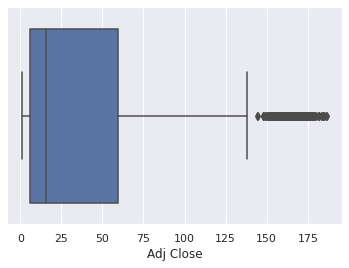

In [107]:
sbn.boxplot(x=amzn['Adj Close'])

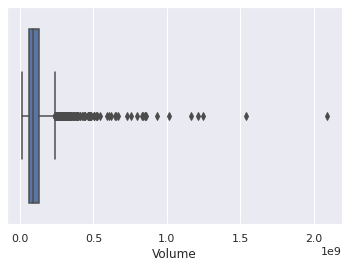

In [108]:
sbn.boxplot(x=amzn['Volume'])

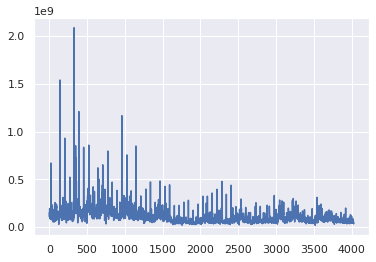

In [109]:
plt.plot(amzn['Volume'])

### Preparação dos Dados para aplicar os Modelos de Predição

---

In [110]:
amznPred = amzn.set_index('Date')

In [111]:
amznPred.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-28,170.182495,172.175995,169.135498,170.660995,170.660995,54638000
2021-12-29,170.839996,171.212006,168.600494,169.201004,169.201004,35754000
2021-12-30,169.699997,170.888000,168.524002,168.644501,168.644501,37584000


In [112]:
amznPred['RSI'] = ta.RSI(amznPred['Close'],14)

In [113]:
amznPred.loc[:, 'RSI_Sinal'] = np.where(amznPred['RSI'] < 40, 1, 0)

In [114]:
amznPred['slow_k'], amznPred['slow_d'] = ta.STOCH(amznPred['High'], amznPred['Low'], amznPred['Adj Close'], 
                                              fastk_period=14, slowk_period=3, slowk_matype=0, 
                                              slowd_period=3, slowd_matype=0)

In [115]:
amznPred.loc[:, 'Stoch_Sinal'] = np.where(amznPred['slow_k'] > amznPred['slow_d'], 1, 0)

In [116]:
amznPred['ret1'] = amznPred['Adj Close'].pct_change()
amznPred['retFut1'] = amznPred.ret1.shift(-1)

In [117]:
amznPred = amznPred.dropna()
predictor_list = ['RSI_Sinal','Stoch_Sinal']
X = amznPred[predictor_list]
y = np.where(amznPred.retFut1 > 0.0, 1.0, 0)

###Naive Bayes

In [118]:
amznPred.tail(5)

,Open,High,Low,Close,Adj Close,Volume,RSI,RSI_Sinal,slow_k,slow_d,Stoch_Sinal,ret1,retFut1
Date,,,,,,,,,,,,,
2021-12-22,169.270004,172.050003,168.500504,171.037003,171.037003,55036000,47.885722,0,34.879390,30.013643,1,0.003638,0.000184
2021-12-23,170.427994,171.975006,170.149994,171.068497,171.068497,36788000,47.940197,0,45.884296,37.074283,1,0.000184,-0.008178
2021-12-27,171.037003,172.942993,169.215500,169.669495,169.669495,58688000,45.657123,0,43.859255,41.540981,1,-0.008178,0.005844
2021-12-28,170.182495,172.175995,169.135498,170.660995,170.660995,54638000,47.563096,0,43.235388,44.326313,0,0.005844,-0.008555
2021-12-29,170.839996,171.212006,168.600494,169.201004,169.201004,35754000,45.057107,0,38.664772,41.919805,0,-0.008555,-0.003289


In [119]:
clf = MultinomialNB()
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

for s in scores:
  print(f"Score: {s}")
print(f"\nAcurácia MultinomialNB: {100*scores.mean():.2f}%")

Score: 0.5199501246882793
Score: 0.5199501246882793
Score: 0.5199501246882793
Score: 0.5199501246882793
Score: 0.519350811485643

Acurácia MultinomialNB: 51.98%


In [120]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)

for s in score:
  print(f"Score: {s}")
print(f"\nAcurácia MultinomialNB: {100*score.mean():.2f}%")

Score: 0.486284289276808
Score: 0.5386533665835411
Score: 0.5236907730673317
Score: 0.5187032418952618
Score: 0.49875311720698257
Score: 0.486284289276808
Score: 0.5361596009975063
Score: 0.5211970074812967
Score: 0.5261845386533666
Score: 0.5625

Acurácia MultinomialNB: 51.98%


In [121]:
train_length = int(len(amznPred)*0.80)

X_train = X[:train_length] 
X_test =  X[train_length:]

y_train = y[:train_length]
y_test = y[train_length:]

In [122]:
model = BernoulliNB().fit(X_train, y_train)
model.fit(X_train, y_train)
predicted_signal = model.predict(X_test)

In [123]:
print("Acurácia Binomial Naive Bayes (%):", metrics.accuracy_score(y_test, predicted_signal)*100)

Acurácia Binomial Naive Bayes (%): 53.11720698254364


###Redes Neurais

In [124]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 2.64612849,  1.0007486 ],
       [ 2.64612849,  1.0007486 ],
       [ 2.64612849,  1.0007486 ],
       ...,
       [-0.3779106 ,  1.0007486 ],
       [-0.3779106 , -0.99925196],
       [-0.3779106 , -0.99925196]])

In [125]:
 X_train, X_teste, y_train, y_teste= train_test_split(X,y, test_size = 0.2, random_state = 21)

In [126]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [127]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,
                           activation = 'relu',solver='adam',random_state=1)

In [128]:
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [129]:
y_pred = classifier.predict(X_teste)

In [130]:
cm = confusion_matrix(y_pred, y_teste)
print(f"Accuracy of MLPClassifier : {accuracy(cm)*100:.2f}%")

Accuracy of MLPClassifier : 52.49%


###Máquinas de Vetores de Suportes (SVM)

In [131]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 2.64612849,  1.0007486 ],
       [ 2.64612849,  1.0007486 ],
       [ 2.64612849,  1.0007486 ],
       ...,
       [-0.3779106 ,  1.0007486 ],
       [-0.3779106 , -0.99925196],
       [-0.3779106 , -0.99925196]])

In [132]:
 X_train, X_teste, y_train, y_teste= train_test_split(X,y, test_size = 0.2, random_state = 21)

In [133]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [134]:
y_pred = svm.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [137]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(f"Acurácia SVC com kernel Linear: {accuracy(cm)*100:.2f}%")

[[  0 376]
 [  0 426]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       376
         1.0       0.53      1.00      0.69       426

    accuracy                           0.53       802
   macro avg       0.27      0.50      0.35       802
weighted avg       0.28      0.53      0.37       802

Acurácia SVC com kernel Linear: 53.12%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=23)
scoring = 'accuracy'
score = cross_val_score(svm, X, y, cv=k_fold, n_jobs=1, scoring=scoring)

for s in score:
  print(f"Score: {s}")
print(f"\nAcurácia SVC com Kernel Linear: {100*score.mean():.2f}%")

Score: 0.5012468827930174
Score: 0.486284289276808
Score: 0.5386533665835411
Score: 0.5336658354114713
Score: 0.49875311720698257
Score: 0.5062344139650873
Score: 0.5586034912718204
Score: 0.5087281795511222
Score: 0.5336658354114713
Score: 0.5325

Acurácia SVC com Kernel Linear: 51.98%
